# Projeto 2

Nome: Gabriela de Mesquita Sampaio Duarte
    
Nome: Gustavo de Lorenzi Cancellier Katz

Nome: Mariana de Camargo Salles Cezar

## Contextualização 

Pokémon é uma franquia de mídia que foi criada em 1995 centrada em criaturas ficcionais chamadas "Pokémon", onde seres humanos os capturam e os treinam para lutarem uns contra os outro como um esporte.

Os jogos originais de Pokémon são com elementos de estratégia divididos por gerações. Essas gerações são cronologicamente divididas pelo seu lançamento; a cada determinado número de anos contendo novos Pokémon, personagens e conceitos de jogabilidade, aquela sequência é considerada o começo de uma nova geração da franquia. 

O objetivo do jogo é capturar todas as espécies de Pokémon disponíveis na região fictícia onde o jogo está configurado e completar a informação de todos os Pokémon no Pokédex. Além disso, eles devem ser treinados para enfrentar outros Pokémon pertencentes a outros treinadores a fim de demonstrar suas habilidades, força e talento e assim se tornar um "Mestre Pokémon". Para conseguir isso, o treinador viaja por todas as regiões do mundo dos Pokémon, coletando "insígnias de ginásio", que são obtidas após derrotar os líderes de ginásio em uma batalha na qual tanto os pokemons dos treinadores quanto o dos líderes de ginásio se enfrentam para testar suas habilidades especiais em uma batalha Pokémon.

#### Dataset

O dataset utilizado no projeto contém a Pokédex  e apresenta as seguintes informações:

- "Abilities": habilidades
- Against Bug: contra lama   
- Against Dark: contra sombrio
- Against Dragon: contra dragão
- Against Electric: contra eletricidade
- Against Fairy: contra fada
- Against Fight: contra lutador
- Against Fire: contra fogo
- Against Flying: contra voador
- Against Ghost: contra fantasma
- Against Grass: contra grama
- Against Ground: contra 
- Against Ice: contra gelo
- Against Normal: contra normais
- Against Poison: contra veneno
- Against Psychic: contra
- Against Rock: contra pedra
- Against Steel: contra aço
- Against Water: contra água
- Attack: ataque
- Base Egg Steps: Quantos passos tem que dar para chocar o ovo
- Base Happiness: base de felicidade
- Base Total: base total
- Capture Rate: probabilidade de captura
- Classfication: classificação
- Defense: defesa 
- Experience Growth: taxa de experiência 
- Height M: altura macho 
- Hp: vida
- Japanese name: nome japones
- Name: nome
- Percentage male: porcentagem 
- Pokedex number: número na Pokedex
- Sp Attack: Ataque especial 
- Sp Defense: Defesa especial
- Speed: velocidade
- Type1: Tipo 1
- Type2: Tipo 2
- Weight kg: Peso em Kg
- Generation: geração
- Is legendary: é lendário?


Analisando essas informações seria possível observar padrões para prever o tipo 1(primário) dos pokémons. Dessa forma, os features serão as informações das colunas das relações da porcentagem de dano entre os tipos primários. 


Como o target do nosso projeto é uma variável qualitativa, será utilizado o método de **Classificadores**.

## Lendo o Dataset

#### Importando as bibliotecas necessárias

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pylab import rcParams

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report



# bibliotecas básicas para manipular qualquer modelo
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


# separador entre base de treino e de teste
from sklearn.model_selection import train_test_split

# ferramenta de normalização, essencial para o modelo
from sklearn.preprocessing import StandardScaler

# o modelo de classificação propriamente dito
from sklearn.neighbors import KNeighborsClassifier

# algumas funções para testar o modelo posteriormete:
# (explicadas no Turing Talks #11)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##### Verificando o diretório em que o arquivo está

In [150]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}! :)')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv! :)


#### Lendo o arquivo

In [151]:
df = pd.read_csv("pokemon.csv")
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


Pegando apenas os nomes das colunas:

In [79]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

Dentro do universo do Pokémon existem duas caracteríscas relevantes para os jogadores, sendo elas a distribuição de habilidades e como que cada tipo se caracteriza com os outros, portanto nossa análise sera voltada para esses dados.

## Preparação para a Análise 

Para começar fizemos o plot de relacionamentos entre pares de habilidades. Por padrão, esta função cria uma grade de eixos de forma que cada variável numérica seja compartilhada entre os eixos y em uma única linha e os eixos x em uma única coluna. Os gráficos diagonais são tratados de forma diferente: um gráfico de distribuição univariada é desenhado para mostrar a distribuição marginal dos dados em cada coluna.


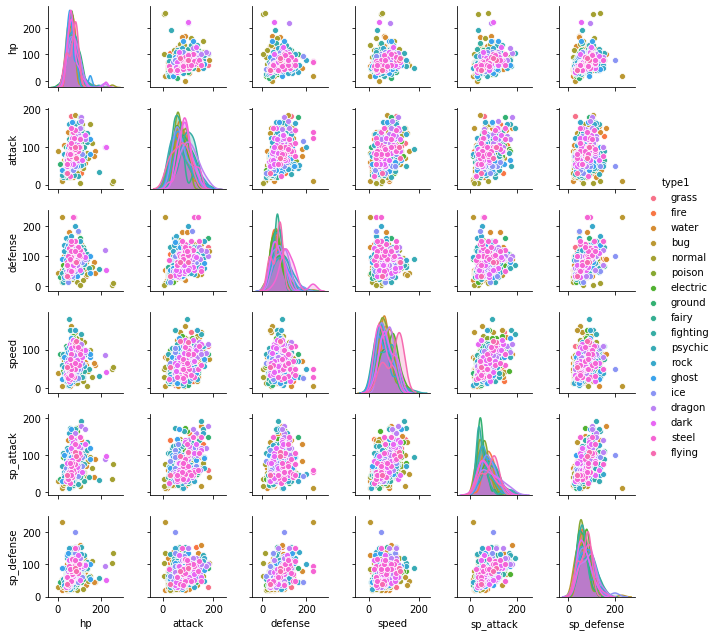

In [77]:
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

sns.pairplot(habilidades, height=1.5, hue='type1');

Com isso podemos observar que os dados se comportam de forma semelhante, o que poderia ocasionar em uma perda de precisão ao tentar prever os tipos dos pokémons.

Em sequência, foi feito  o mesmo tipo de análise com as caracteríscas de comportamento entre os tipos, que foi dividida em 3 plotagens para facilitar a visualização e o tempo de plotagem

C:\Users\Gustavo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Gustavo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


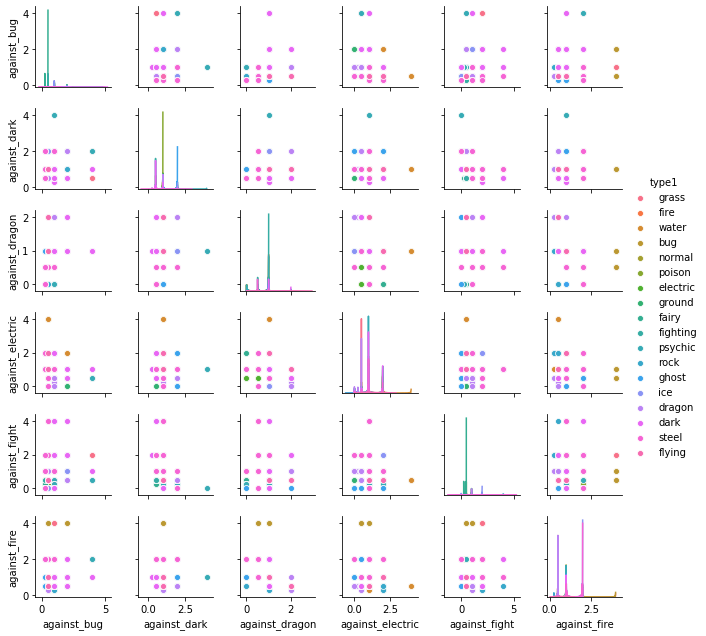

In [103]:
caracteristicas = df.loc[:, ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fight', 'against_fire', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');

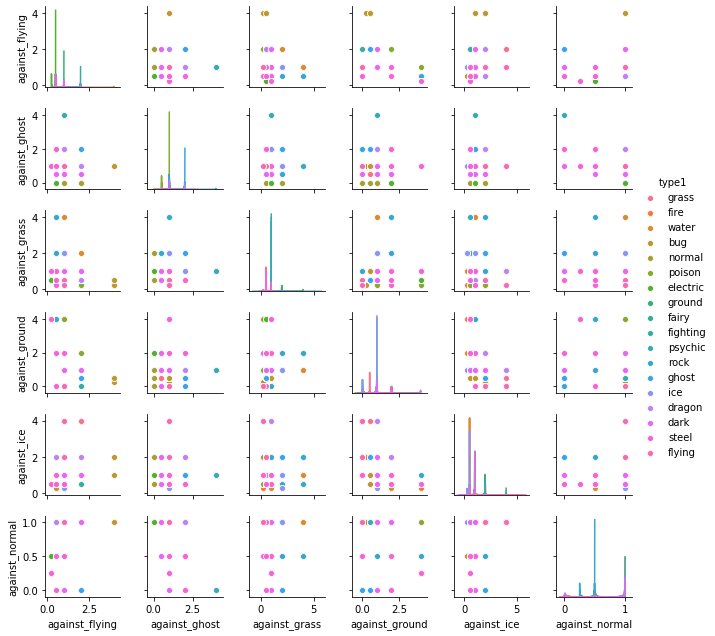

In [104]:
caracteristicas = df.loc[:, ['against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');

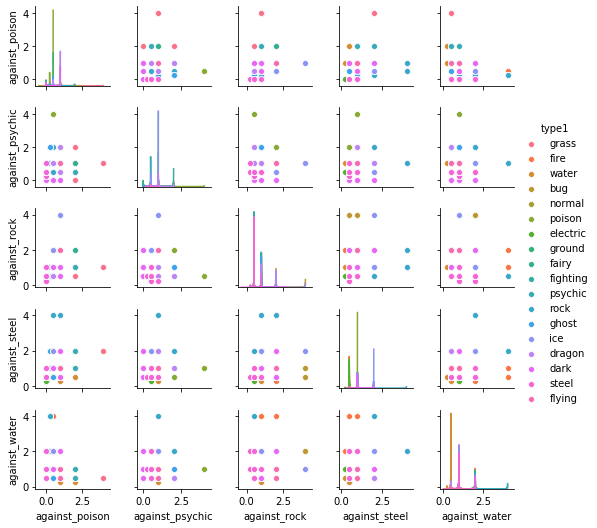

In [5]:
caracteristicas = df.loc[:, ['against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');